In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import einops
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kurtosis, skew

# 2.1 Images

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True,
                               download=True, 
                               transform=transform)


In [5]:
subset_size = 1000
subset_indices = torch.randperm(len(mnist_dataset))[:subset_size]
subset = torch.utils.data.Subset(mnist_dataset, subset_indices)

In [6]:
subset_images = torch.stack([img for img, _ in subset])
subset_labels = torch.tensor([label for _, label in subset])

In [7]:
print(f"Subset labels shape: {subset_labels.shape}")
print(f"Subset images shape: {subset_images.shape}")

Subset labels shape: torch.Size([1000])
Subset images shape: torch.Size([1000, 1, 28, 28])


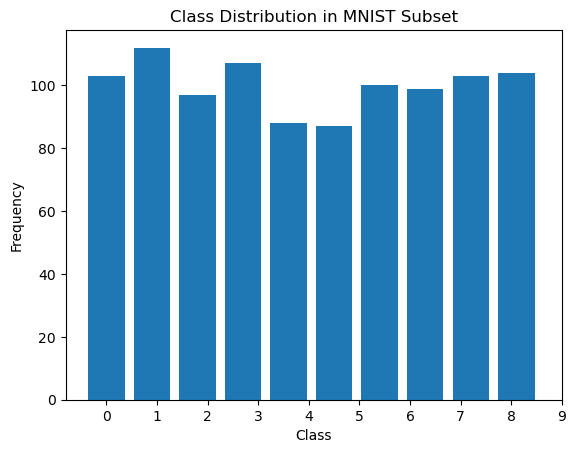

In [8]:
# Histogram 
plt.hist(subset_labels.numpy(), bins=10, range=(0, 9), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in MNIST Subset')
plt.show()

In [9]:
batch_size = 25
batched_images = einops.rearrange(subset_images, 
                                  '(b s) c h w -> b s c h w', 
                                  s=batch_size)

print(f"Batched images shape: {batched_images.shape}")

Batched images shape: torch.Size([40, 25, 1, 28, 28])


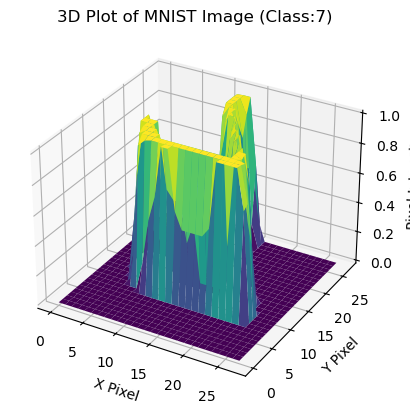

In [10]:
random_index = np.random.randint(0, subset_size)
image = subset_images[random_index].squeeze().numpy()

x = np.arange(28)
y = np.arange(28)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, image, cmap='viridis')

ax.set_xlabel('X Pixel')
ax.set_ylabel('Y Pixel')
ax.set_zlabel('Pixel Intensity')
ax.set_title(f'3D Plot of MNIST Image (Class:{subset_labels[random_index].item()})')
plt.show()

# 2.2 Time Series

In [12]:
energy_data = pd.read_csv('/Users/sanjeedajeba/Downloads/energydata_complete.csv')


print(energy_data.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

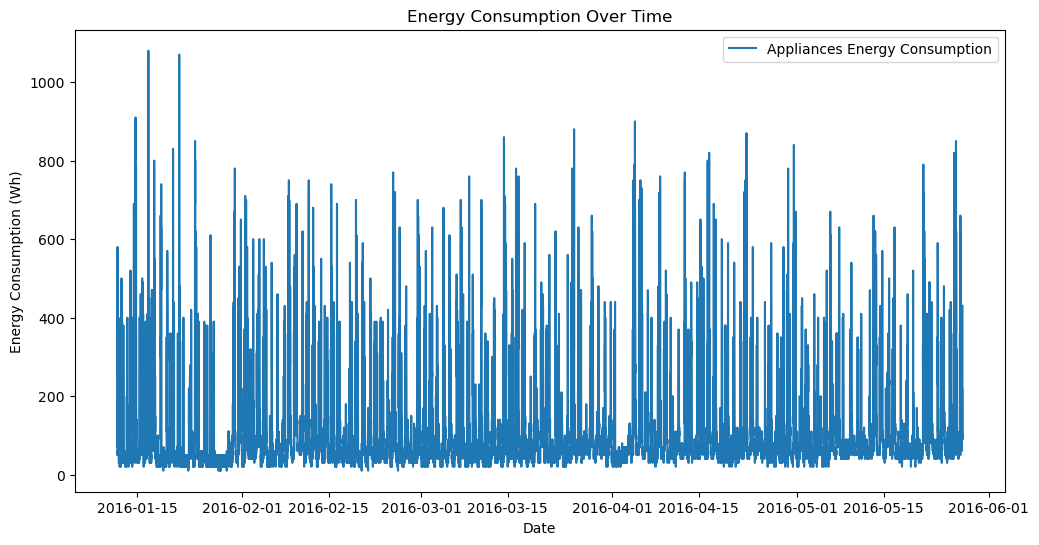

In [13]:
energy_data['date'] = pd.to_datetime(energy_data['date'])


plt.figure(figsize=(12, 6))
plt.plot(energy_data['date'], 
         energy_data['Appliances'], 
         label='Appliances Energy Consumption')


plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.show()

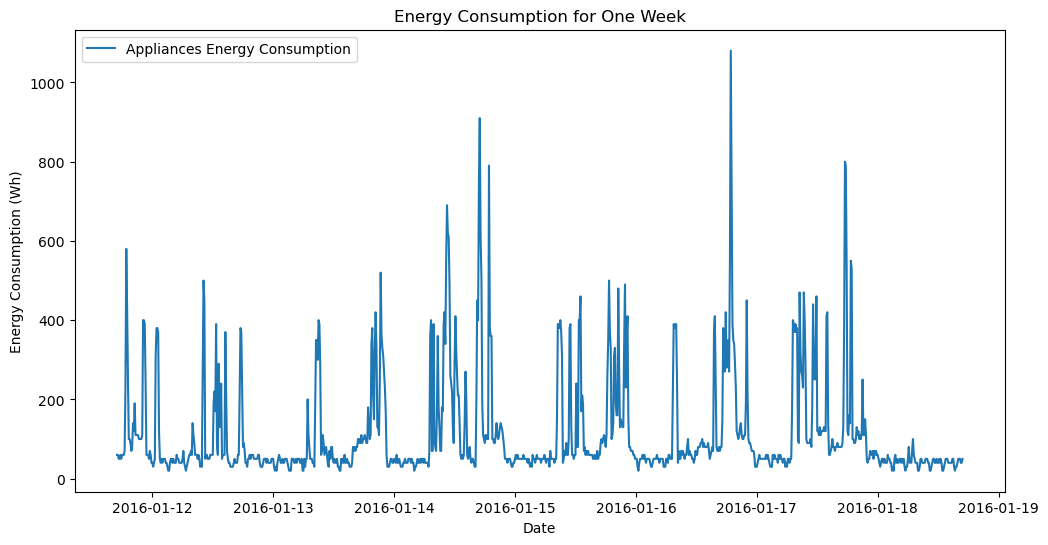

In [14]:
one_week = energy_data[:1008]
plt.figure(figsize=(12, 6))


plt.plot(one_week['date'], 
         one_week['Appliances'], 
         label='Appliances Energy Consumption')


plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption for One Week')
plt.legend()
plt.show()

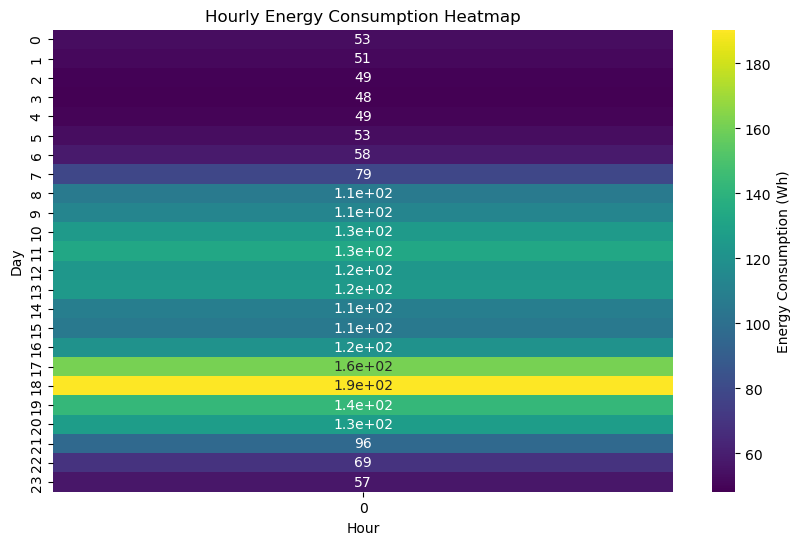

In [15]:
energy_data['hour'] = energy_data['date'].dt.hour


hourly_energy = energy_data.groupby('hour')['Appliances'].mean()


plt.figure(figsize=(10, 6))
sns.heatmap(hourly_energy.values.reshape(24, 1), 
            annot=True, cmap='viridis', 
            cbar_kws={'label': 'Energy Consumption (Wh)'})

plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Hourly Energy Consumption Heatmap')
plt.show()

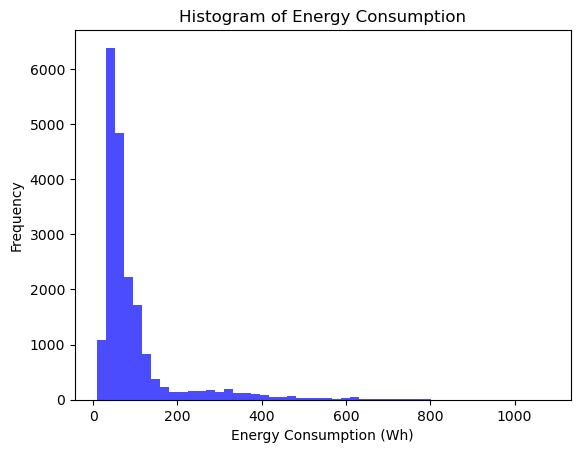

In [16]:
plt.hist(energy_data['Appliances'], bins=50, 
         color='blue', alpha=0.7)

plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption')
plt.show()

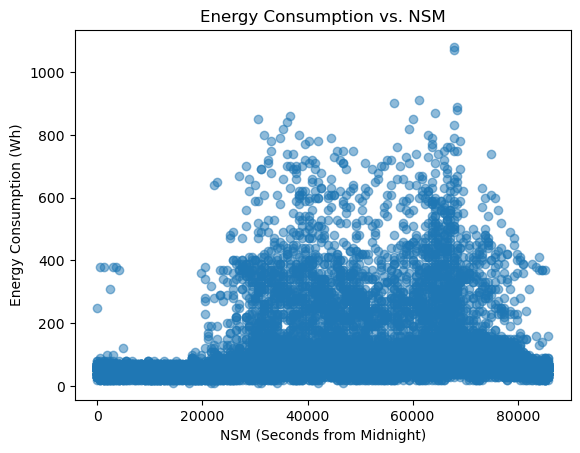

In [17]:
energy_data['NSM'] = (energy_data['date'].dt.hour * 3600) + (energy_data['date'].dt.minute * 60) + energy_data['date'].dt.second


plt.scatter(energy_data['NSM'], energy_data['Appliances'], 
            alpha=0.5)

plt.xlabel('NSM (Seconds from Midnight)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. NSM')
plt.show()

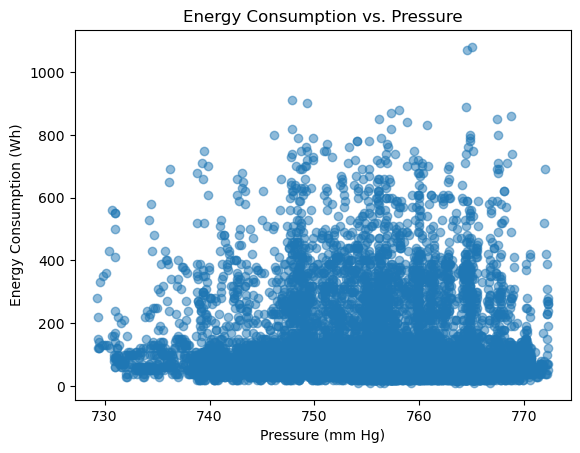

In [18]:
plt.scatter(energy_data['Press_mm_hg'], energy_data['Appliances'], 
            alpha=0.5)
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Pressure')
plt.show()

# 2.3 Multi-variate

In [20]:
# The airfoil data
airfoil_data = pd.read_csv('/Users/sanjeedajeba/Downloads/airfoil_self_noise.dat', sep='\t', 
                           header=None)
airfoil_data.columns = ['Frequency', 'Angle', 
                        'Chord Length', 'Velocity', 
                        'Thickness', 'Pressure']

print(airfoil_data.head())

   Frequency  Angle  Chord Length  Velocity  Thickness  Pressure
0        800    0.0        0.3048      71.3   0.002663   126.201
1       1000    0.0        0.3048      71.3   0.002663   125.201
2       1250    0.0        0.3048      71.3   0.002663   125.951
3       1600    0.0        0.3048      71.3   0.002663   127.591
4       2000    0.0        0.3048      71.3   0.002663   127.461


In [21]:

stats = {
    'Mean': airfoil_data.mean(),
    'Variance': airfoil_data.var(),
    'Median': airfoil_data.median(),
    'Kurtosis': kurtosis(airfoil_data),
    'Skewness': skew(airfoil_data),
    'Range': airfoil_data.max() - airfoil_data.min()
}


stats_df = pd.DataFrame(stats)
print(stats_df)

                     Mean      Variance       Median  Kurtosis  Skewness  \
Frequency     2886.380572  9.938717e+06  1600.000000  5.685722  2.134951   
Angle            6.782302  3.502424e+01     5.400000 -0.415568  0.688476   
Chord Length     0.136548  8.749868e-03     0.101600 -1.038504  0.457001   
Velocity        50.860745  2.425116e+02    39.600000 -1.562743  0.235617   
Thickness        0.011140  1.729287e-04     0.004957  2.207539  1.700465   
Pressure       124.835943  4.759146e+01   125.721000 -0.317132 -0.418534   

                     Range  
Frequency     19800.000000  
Angle            22.200000  
Chord Length      0.279400  
Velocity         39.600000  
Thickness         0.058011  
Pressure         37.607000  
